In [1]:
import sys

import numpy as np

from matplotlib import pyplot as plt, colors, cm, scale as mscale
from matplotlib.collections import LineCollection

sys.path.append('..')
from sketched.sketched import DiscreteSpectrum, SketchedEquivalence

In [2]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{bm}')
plt.rcParams['figure.figsize'] = [6, 2]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 'small'
plt.rcParams['axes.titlepad'] = 3
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = plt.rcParams['xtick.labelsize']
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.handlelength'] = 1.5
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 0.7
plt.rcParams['patch.linewidth'] = 0.7
plt.rcParams['hatch.linewidth'] = 0.7
plt.rcParams['axes.linewidth'] = 0.6
plt.rcParams['grid.linewidth'] = 0.6
plt.rcParams['xtick.major.width'] = 0.6
plt.rcParams['xtick.minor.width'] = 0.4
plt.rcParams['ytick.major.width'] = plt.rcParams['xtick.major.width']
plt.rcParams['ytick.minor.width'] = plt.rcParams['xtick.minor.width']

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
class ColorMap2D(object):
    
    def __init__(self, corner_colors, middle_colors, center_color, hmid=0.5, vmid=0.5, prefix=None):
        """2D colormap object
        
        All orders are clockwise starting from the top:
        
            `corner_colors` order: top-left, top-right, bottom-right, bottom-left
            `middle_colors` order: top, right, bottom, left
        
        """
        
        self.corner_colors = corner_colors
        self.middle_colors = middle_colors
        self.center_color = center_color
        
        self.hmid = hmid
        self.vmid = vmid
        
        if prefix is None:
            self.prefix = f'{np.random.randint(10 ** 12):x}'
        else:
            self.prefix = prefix
            
        self.cmaps = {}
        
        self.cmap_top = self._get_cmap('top', self.corner_colors[0], self.middle_colors[0], self.corner_colors[1], mid=self.hmid)
        self.cmap_bottom = self._get_cmap('bottom', self.corner_colors[3], self.middle_colors[2], self.corner_colors[2], mid=self.hmid)
        self.cmap_left = self._get_cmap('left', self.corner_colors[0], self.middle_colors[3], self.corner_colors[3], mid=self.vmid)
        self.cmap_right = self._get_cmap('right', self.corner_colors[1], self.middle_colors[1], self.corner_colors[2], mid=self.vmid)
        
        self.cmap_hmid = self._get_cmap('hmid', self.middle_colors[3], self.center_color, self.middle_colors[1], self.hmid)
        self.cmap_vmid = self._get_cmap('vmid', self.middle_colors[0], self.center_color, self.middle_colors[2], self.vmid)
    
    def cmap_hslice(self, v):
        
        if v < 0 or v > 1:
            raise ValueError(f'Expected v in [0, 1], got {v=}.')
        
        cmap = self._get_cmap(f'hslice_{v=}', self.cmap_left(v), self.cmap_vmid(v), self.cmap_right(v), mid=self.hmid)
        return cmap
    
    def cmap_vslice(self, v):
        
        if v < 0 or v > 1:
            raise ValueError(f'Expected v in [0, 1], got {v=}.')
        
        cmap = self._get_cmap(f'vslice_{v=}', self.cmap_top(v), self.cmap_hmid(v), self.cmap_bottom(v), mid=self.vmid)
        return cmap
    
    def get_image(self, N):
        
        im = np.zeros((N, N, 4))
        for i in range(N):
            im[i, :, :] = cmap2d.cmap_hslice(i / (N - 1))(np.arange(N) / (N - 1))
        
        return im
    
    def _get_cmap(self, name, c1, c2, c3, mid=0.5):
        
        if name in self.cmaps:
            return self.cmaps[name]
        
        cmap = colors.LinearSegmentedColormap.from_list(f'{self.prefix}_{name}', [
            (0, c1), (mid, c2), (1, c3)
        ])
        
        self.cmaps[name] = cmap
        
        return cmap

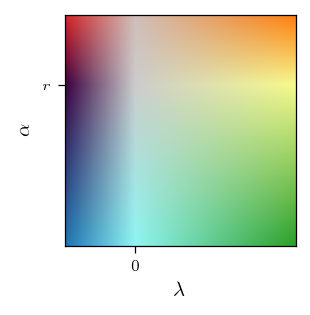

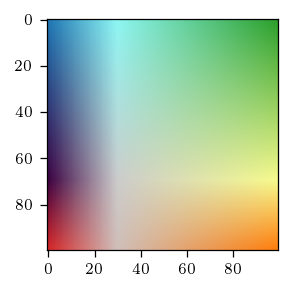

True

In [4]:
def mix_gray(c1_hex, c2_hex, gray_hex, gray_weight=0.5):
    
    c1_hsv = colors.rgb_to_hsv(colors.hex2color(c1_hex))
    c2_hsv = colors.rgb_to_hsv(colors.hex2color(c2_hex))
    gray_rgb = np.asarray(colors.hex2color(gray_hex))
    
    if abs(c1_hsv[0] - c2_hsv[0]) > 0.5:
        cmid_rgb = np.asarray(colors.hsv_to_rgb((c1_hsv + c2_hsv + np.asarray([1, 0, 0])) / 2 - np.asarray([1, 0, 0])))
    else:
        cmid_rgb = np.asarray(colors.hsv_to_rgb((c1_hsv + c2_hsv) / 2))
    return colors.rgb2hex(cmid_rgb * (1 - gray_weight) + gray_rgb * gray_weight)
    
corner_colors = [
    color_cycle[0],
    color_cycle[2],
    color_cycle[1],
    color_cycle[3],
]
gray_weight = 0.9
middle_colors = [
    mix_gray(corner_colors[0], corner_colors[1], '#9ff', gray_weight),
    mix_gray(corner_colors[1], corner_colors[2], '#ff9', gray_weight),
    mix_gray(corner_colors[2], corner_colors[3], '#ccc', gray_weight),
    mix_gray(corner_colors[3], corner_colors[0], '#303', gray_weight),
]
cmap2d = ColorMap2D(corner_colors, middle_colors, '#ccc', hmid=0.3, vmid=0.7)

N = 100
plt.imshow(np.flip(cmap2d.get_image(N), axis=0))
plt.yticks([N * 3 // 10], ['$r$'])
plt.ylabel(r'$\alpha$')
plt.xticks([N * 3 // 10], [0])
plt.xlabel(r'$\lambda$')
plt.show()

im = np.zeros((N, N, 4))
for i in range(N):
    im[:, i, :] = cmap2d.cmap_vslice(i / (N - 1))(np.arange(N) / (N - 1))

plt.imshow(im)
plt.show()

np.allclose(cmap2d.get_image(N), im)

In [5]:
r = 1/2

spec_vec = np.linalg.eigvalsh((lambda X: X.T @ X / X.shape[0])(np.random.randn(int(r * 1000), 1000)))
#spec_vec = np.pad(spec_vec, (0, int(len(spec_vec) * (1 - r) / r)))
# find biggest scale jump
spec_vec[spec_vec <= 0] = np.min(spec_vec[spec_vec > 0])
i = np.argmax(np.diff(np.log(spec_vec[spec_vec > 0])))
spec_vec[:i + 1] = 0
spec_vec *= r

spectrum1 = DiscreteSpectrum([1, 0], [r, 1 - r])
spectrum2 = DiscreteSpectrum(spec_vec)

In [6]:
spectrum1.trace(), spectrum2.trace(), spectrum2.min_nz_eigval

(0.5, 0.5000537269032057, 0.09170755024410641)

In [7]:
(1 - np.sqrt(1/2))**2

0.08578643762690492

In [8]:
def map_lamdas_to_mus(spectrum, lamdas, alphas):
    
    equivalences = [SketchedEquivalence(spectrum, alpha) for alpha in alphas]
    
    mus = np.zeros((len(lamdas), len(alphas)))
    
    for i, lamda in enumerate(lamdas):
        for j, (equiv, alpha) in enumerate(zip(equivalences, alphas)):
            
            mu = equiv.get_mu_from_lamda(lamda)
            
            if mu is None:
                mus[i, j] = np.nan
            else:
                mus[i, j] = mu
    
    return mus

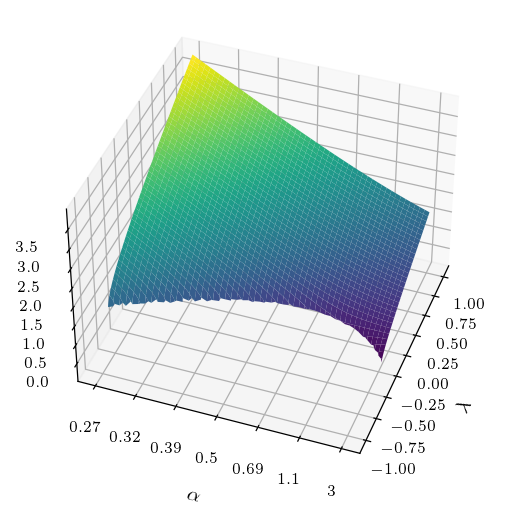

In [9]:
def get_reciprocal_scale_tuple():
    
    def recip(x):
        return - 1 / x
    
    return recip, recip

# test axis scaling
fig, ax = plt.subplots(1, 1, dpi=150, figsize=(5, 4), subplot_kw={"projection": "3d"})

lamdas = np.linspace(-1, 1, 1000)
alphas = np.linspace(1 / 3, 2 + 2 - 1 / 3, 200)

mus = map_lamdas_to_mus(DiscreteSpectrum([1]), lamdas, 1 / alphas)

lamdas, alphas = np.meshgrid(lamdas, alphas, indexing='ij')

ax.plot_surface(lamdas, alphas, mus, cmap='viridis')
ax.view_init(elev=40., azim=200.)

ticksat = np.linspace(1 / 3, 4 - 1 / 3, 7)
ax.set_yticks(ticksat, [f'{1 / x:.2g}' for x in ticksat])
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$\alpha$')
ax.set_zlabel(r'$\mu$')

plt.show()

/tmp/ipykernel_27959/977082745.py:17: RuntimeWarning: divide by zero encountered in divide
  plot_colored_line(plt.gca(), xs, 1 / np.sin(3 * xs), np.abs(np.cos(7 * xs)), cm.autumn)


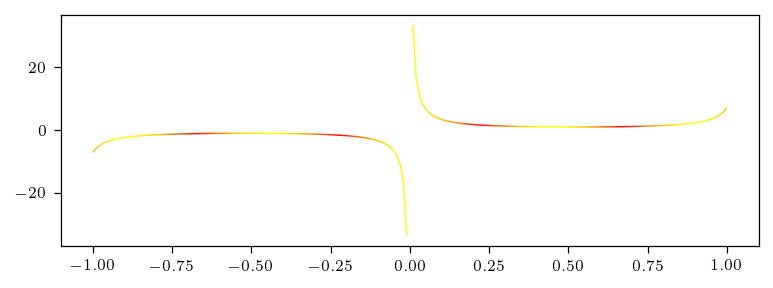

In [10]:
def plot_colored_line(ax, xs, ys, cs, cmap):
    
    xys = np.column_stack([xs, ys])
    segs = np.stack([xys[:-1, :], xys[1:, :]], axis=1)
    seg_cs = (cs[:-1] + cs[1:]) / 2
    
    lc = LineCollection(segs, cmap=cmap)
    lc.set_array(seg_cs)
    
    ax.add_collection(lc)
    ax.autoscale_view()
    return ax

# test functionality
xs = np.linspace(-1, 1, 201)
plt.figure(dpi=150)
plot_colored_line(plt.gca(), xs, 1 / np.sin(3 * xs), np.abs(np.cos(7 * xs)), cm.autumn)
plt.show()

/tmp/ipykernel_27959/1232348671.py:4: RuntimeWarning: divide by zero encountered in divide
  return - 1 / x


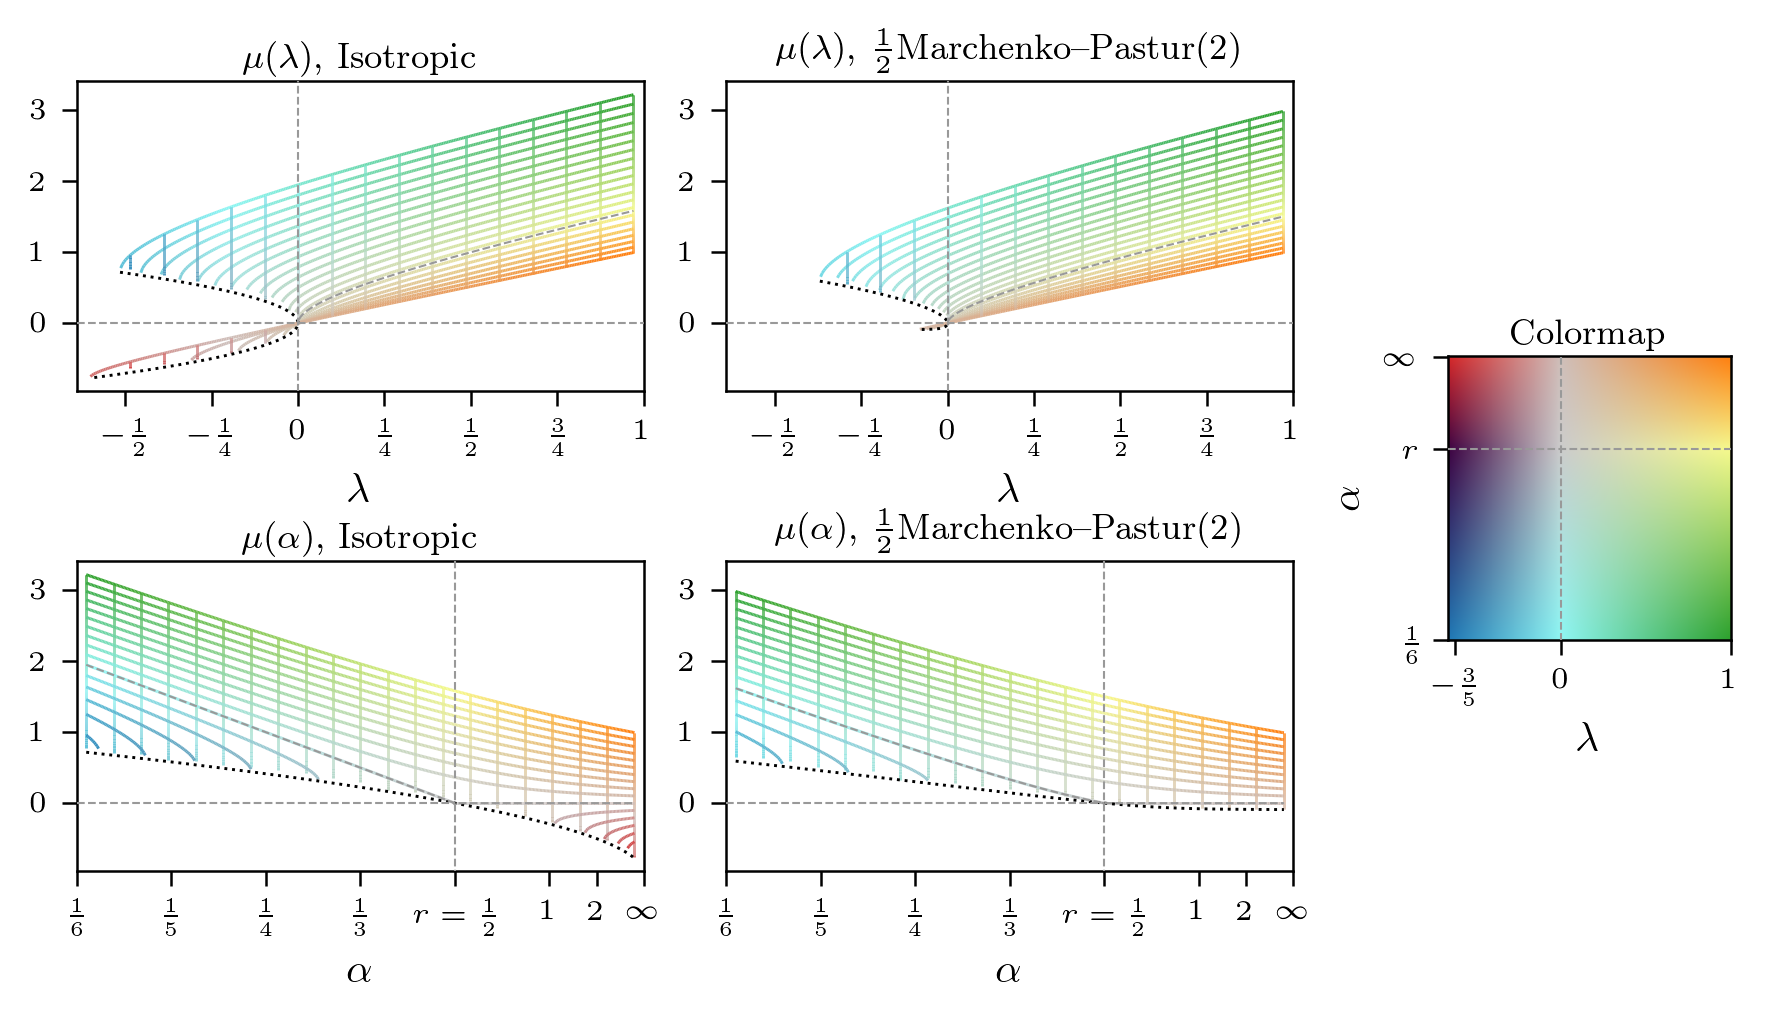

In [11]:
lamda_min, lamda_max = -0.97, 0.97
lamda_lower_bound, lamda_upper_bound = -0.64, 1
alpha_min, alpha_max = 1 / 5.9, 10
alpha_lower_bound, alpha_upper_bound = 1/6, 1000

lamda_ticks = [-1/2, -1/4, 0, 1/4, 1/2, 3/4, 1]
lamda_ticks_labels = [
    r'$-\frac{1}{2}$', r'$-\frac{1}{4}$', 0,
    r'$\frac{1}{4}$', r'$\frac{1}{2}$', r'$\frac{3}{4}$', 1
]
lamda_cmap_ticks = [-3/5, 0, 1]
lamda_cmap_ticks_labels = [
    r'$-\frac{3}{5}$', 0, 1
]
alpha_ticks = [1/6, 1/5, 1/4, 1/3, 1/2, 1, 2, 1000]
alpha_ticks_labels = [
    r'$\frac{1}{6}$', r'$\frac{1}{5}$',
    r'$\frac{1}{4}$', r'$\frac{1}{3}$', r'$r = \frac{1}{2}$', 
    1, 2, r'$\infty$'
]
alpha_cmap_ticks = [1/6, 1/2, 1000]
alpha_cmap_ticks_labels = [
    r'$\frac{1}{6}$', r'$r$', r'$\infty$'
]

n_dense = 400
n_sparse = 21

spectra = [spectrum1, spectrum2]
spectra_names = ['Isotropic', r'$\tfrac{1}{2}$Marchenko--Pastur($2$)']

lamda_scale = 'linear'
lamda_norm = colors.Normalize(lamda_lower_bound, lamda_max)
alpha_scale_funs = get_reciprocal_scale_tuple()
alpha_norm = colors.FuncNorm(alpha_scale_funs, alpha_min, alpha_max)

lamdas_dense = np.linspace(lamda_min, lamda_max, n_dense)
lamdas_sparse = np.linspace(lamda_min, lamda_max, n_sparse)
alphas_dense = 1 / np.linspace(1 / alpha_max, 1 / alpha_min, n_dense)[::-1]
alphas_sparse = 1 / np.linspace(1 / alpha_max, 1 / alpha_min, n_sparse)[::-1]

r_loc = np.interp(r, alphas_dense, np.linspace(0, 1, n_dense))
zero_loc = np.interp(0, [lamda_lower_bound, lamda_max], [0, 1])
cmap2d = ColorMap2D(corner_colors, middle_colors, '#ccc', hmid=zero_loc, vmid=r_loc)

fig, axes = plt.subplots(
    2, 3, 
    dpi=300, figsize=(6, 3.5), 
    gridspec_kw={'width_ratios': [2, 2, 1]}
)

for j, (spectrum, spectrum_name) in enumerate(zip(spectra, spectra_names)):

    mus_of_lamdas = map_lamdas_to_mus(spectrum, lamdas_dense, alphas_sparse)
    mus_of_alphas = map_lamdas_to_mus(spectrum, lamdas_sparse, alphas_dense)
    
    for k, alpha in enumerate(alphas_sparse):
        plot_colored_line(axes[0, j], lamdas_dense, mus_of_lamdas[:, k], lamda_norm(lamdas_dense), cmap2d.cmap_hslice(np.clip(alpha_norm(alpha), 0, 1)))
        plot_colored_line(axes[1, j], alpha * np.ones(n_dense), mus_of_lamdas[:, k], lamda_norm(lamdas_dense), cmap2d.cmap_hslice(np.clip(alpha_norm(alpha), 0, 1)))
        
    for k, lamda in enumerate(lamdas_sparse):
        plot_colored_line(axes[1, j], alphas_dense, mus_of_alphas[k, :], alpha_norm(alphas_dense), cmap2d.cmap_vslice(np.clip(lamda_norm(lamda), 0, 1)))
        plot_colored_line(axes[0, j], lamda * np.ones(n_dense), mus_of_alphas[k, :], alpha_norm(alphas_dense), cmap2d.cmap_vslice(np.clip(lamda_norm(lamda), 0, 1)))
    
    axes[0, j].set_xlim(lamda_lower_bound, lamda_max)
    axes[0, j].set_xticks(lamda_ticks, labels=lamda_ticks_labels)
        
    alpha_scale = mscale.FuncScale(axes[1, j], alpha_scale_funs)
    axes[1, j].set_xscale(alpha_scale)
    axes[1, j].set_xlim(alpha_min, alpha_max)
    axes[1, j].set_xticks(alpha_ticks, labels=alpha_ticks_labels)
    
    lamda_0s, mu_0s = zip(*[(lambda x: (x.lamda_0, x.mu_0))(SketchedEquivalence(spectrum, alpha)) for alpha in alphas_dense])
    lamda_0s, mu_0s = np.asarray(lamda_0s), np.asarray(mu_0s)
    axes[0, j].plot(lamda_0s, mu_0s, ':k')
    axes[1, j].plot(alphas_dense, mu_0s, ':k')
    
    # plot guide lines without autoscale
    axes[0, j].autoscale(False)
    axes[1, j].autoscale(False)
    
    axes[0, j].plot([lamda_lower_bound, lamda_upper_bound], [0, 0], '--', color='#999', linewidth=0.5, zorder=10)
    axes[1, j].plot([alpha_lower_bound, r], [0, 0], '--', color='#999', linewidth=0.5, zorder=10)
    
    mus_at_lamda_equals_0 = map_lamdas_to_mus(spectrum, [0], alphas_dense)[0, :]
    axes[0, j].plot([0, 0], [-10, 10], '--', color='#999', linewidth=0.5, zorder=10)
    axes[1, j].plot(alphas_dense, mus_at_lamda_equals_0, '--', color='#999', linewidth=0.5, zorder=10)
    
    mus_at_alpha_equals_r = map_lamdas_to_mus(spectrum, lamdas_dense, [r])[:, 0]
    axes[0, j].plot(lamdas_dense, mus_at_alpha_equals_r, '--', color='#999', linewidth=0.5, zorder=10)
    axes[1, j].plot([r, r], [-10, 10], '--', color='#999', linewidth=0.5, zorder=10)
    
    axes[0, j].set_xlabel(r'$\lambda$')
    axes[1, j].set_xlabel(r'$\alpha$')
    
    axes[0, j].set_title(r'$\mu(\lambda)$, %s' % spectrum_name, pad=5 if j == 1 else 3)
    axes[1, j].set_title(r'$\mu(\alpha)$, %s' % spectrum_name, pad=5 if j == 1 else 3)
    
for i in [0, 1]:
    ylims = np.asarray([ax.get_ylim() for ax in axes[i, :2]])
    for ax in axes[i, :2]:
        ax.set_ylim(ylims[:, 0].min(), ylims[:, 1].max())

N = 500
cmap2d_im = np.flip(cmap2d.get_image(N), axis=0)
axes[0, 2].imshow(cmap2d_im)
axes[0, 2].set_yticks([N * (1 - np.clip(alpha_norm(alpha), 0, 1)) for alpha in alpha_cmap_ticks], alpha_cmap_ticks_labels)
axes[0, 2].set_ylabel(r'$\alpha$')
axes[0, 2].set_xticks([N * np.clip(lamda_norm(lamda), 0, 1) for lamda in lamda_cmap_ticks], lamda_cmap_ticks_labels)
axes[0, 2].set_xlabel(r'$\lambda$')

axes[0, 2].autoscale(False)
axes[0, 2].plot([0, N], N * (1 - alpha_norm(r)) * np.ones(2), '--', color='#999', linewidth=0.5, zorder=10)
axes[0, 2].plot(N * lamda_norm(0) * np.ones(2), [0, N], '--', color='#999', linewidth=0.5, zorder=10)
#axes[0, 2].set_in_layout(False)
axes[0, 2].set_title('Colormap')

axes[1, 2].set_axis_off()
    
plt.tight_layout(w_pad=-0.2, h_pad=0)

for i in range(2):
    pos = axes[i, 1].get_position()
    pos.x0 -= 0.02
    pos.x1 -= 0.02
    axes[i, 1].set_position(pos)

pos = axes[0, 2].get_position()
pos.y0 -= 0.5
axes[0, 2].set_position(pos)

plt.savefig('mu_equiv.pdf', bbox_inches='tight')
plt.show()